## Бэггинг и случайный лес

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits).

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

In [1]:
from sklearn import datasets
digits=datasets.load_digits()
X = digits.data
y = digits.target

## Задание

__1.__ Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

decision_classifier = DecisionTreeClassifier(random_state=0)
cros_val_score = cross_val_score(decision_classifier, X, y, cv = 10)

print(c_v_score.mean())

0.830333723474


__2.__ Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [5]:
from sklearn.ensemble import BaggingClassifier

bag_classifier = BaggingClassifier(DecisionTreeClassifier(random_state = 0),n_estimators = 100)
cros_val_score = cross_val_score(bag_classifier, X, y, cv=10)
print(cros_val_score.mean())

0.925955175982


__3.__ Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех $d$ признаках, а на $\sqrt{d}$ случайных признаков.

Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [7]:
from math import sqrt

bag_classifier = BaggingClassifier(DecisionTreeClassifier(random_state=0),n_estimators = 100,max_features = int(sqrt(X.shape[1])))
cros_val_score = cross_val_score(bag_classifier, X, y, cv = 10)
print(cros_val_score.mean())

0.933261788233


__4.__ Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Попробуйте выбирать опять же $\sqrt{d}$ признаков. 

In [9]:
bag_classifier = BaggingClassifier(DecisionTreeClassifier(random_state = 0, max_features = "sqrt"), n_estimators = 100)
cros_val_score = cross_val_score(bag_classifier, X, y, cv = 10)
print(cros_val_score.mean())

0.952826224067


5.Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности постройте графики зависимости качества от значений параметров.

In [11]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier()
cros_val_score = cross_val_score(rand_forest, X, y, cv = 10)
print(cros_val_score.mean())

0.918976692729


[0.9232384642270498, 0.94156573731880877, 0.9461450934647011, 0.94942499697571936, 0.95281937161766783, 0.94886828724203764, 0.94883309825210405, 0.95060190198097771, 0.94888036781896046, 0.95227582627625795]


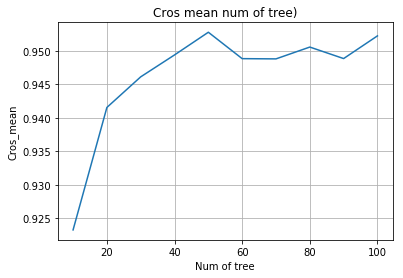

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

tree=np.arange(10, 110, 10)
cros_val_scores = []

for i in tree:
    bag_classifier = BaggingClassifier(DecisionTreeClassifier(random_state = 0,max_features = "sqrt"),n_estimators=i)
    cros_val_score = cross_val_score(bag_classifier, X, y, cv = 10)
    cros_val_scores.append(cros_val_score.mean())
print(cros_val_scores)

plt.grid(True)
plt.plot(tree, cros_val_scores)
plt.xlabel("Num of tree")
plt.ylabel("Cros_mean")
plt.title("Cros mean num of tree)")


[0.94663894590475461, 0.95219969786928649, 0.95336816920878209, 0.94999290932793623, 0.94948961243127616, 0.94488924254420203, 0.93878693369409572, 0.93719926588365077, 0.92934428148819648, 0.93435878760197488]


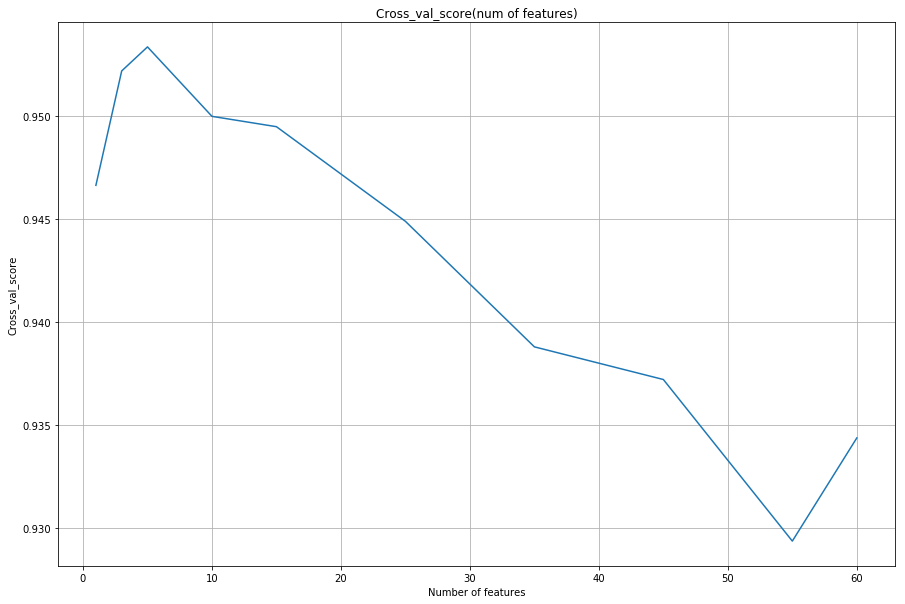

In [26]:
crossvalscore=[]
numfeatures = [1,3,5,10,15,25,35,45,55,60]
for i in numfeatures:
    Bagging=BaggingClassifier(DecisionTreeClassifier(random_state=0,max_features=i),n_estimators=100)
    crossvalscore.append(cross_val_score(Bagging,X,y,cv=10).mean())
print(crossvalscore)

plt.figure(figsize=(15, 10))
plt.plot(numfeatures,crossvalscore)
plt.grid(True)
plt.title("Cross_val_score(num of features)")
plt.xlabel("Number of features")
plt.ylabel("Cross_val_score")

[0.8023061890966533, 0.85753821325985025, 0.89040931085504482, 0.91476338968292781, 0.92987304961498118, 0.93657842250437573, 0.93991306803685748, 0.94777199222748132, 0.95337523269392099, 0.94834107256357281, 0.95325608742130163, 0.95498942130743125, 0.95393082312208688]


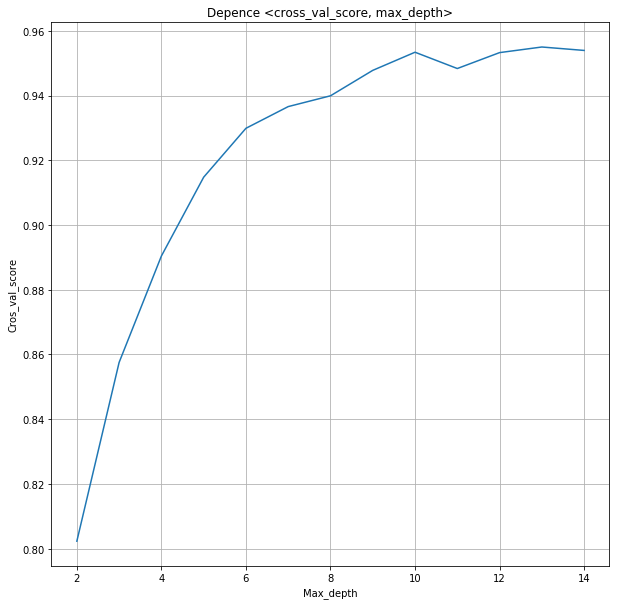

In [27]:
depth = np.arange(2,15,1)
cros_val_scores=[]

for i in depth:
    bag_classifier = BaggingClassifier(DecisionTreeClassifier(random_state = 0,max_features = "sqrt", max_depth = i),n_estimators=100)
    cros_val_score = cross_val_score(bag_classifier, X, y, cv = 10)
    cros_val_scores.append(cros_val_score.mean())
print(cros_val_scores)

plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(depth, cros_val_scores)
plt.xlabel("Max_depth")
plt.ylabel("Cros_val_score")
plt.title("Depence <cross_val_score, max_depth>")

Выберите верные утверждения:
1. Случайный лес сильно переобучается с ростом количества деревьев.
2. При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев.
3. С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.
4. При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.
5. При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.
6. При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.
7. При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

1. Не верно.

2. Верно.

3. Верно.

4. Верно.

5. Не верно.

6. Не верно.

7. Верно.